* [1.Description des données ](#dd)
* [2.Feature engineering](#fe)


In [5]:
import pandas as pd
import numpy as np
import missingno as msno
import os
from datetime import timedelta
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns

%matplotlib inline

In [6]:
os.getcwd()
#os.chdir('C:\\Users\\IMEN\\Documents\\openclassroom\\formation openclassrooms\\projet5')

'C:\\Users\\imen2\\OneDrive\\Documents\\Openclassrooms\\formation_OC\\projet5'

In [7]:
def mean_clus_feat(df,group,feat):
    df_mean=pd.DataFrame(df.groupby(group)[feat].mean()).rename(columns={feat:feat+'_mean'})
    return df_mean

In [8]:
def fnb_customer_cluster(df):
    customer_per_cluster=pd.DataFrame(df.groupby('ClusterID')['CustomerID'].count())\
                .rename(columns={'CustomerID':'nb_customers'}).reset_index()
    return(customer_per_cluster)

### 1.Description des données<a class="anchor" id="dd"></a>

In [9]:
df_cmd=pd.read_csv('commandes_dataset.csv')
df_geo=pd.read_csv('geolocalisation_dataset.csv')
df_cmd['order_purchase_timestamp']= pd.to_datetime(df_cmd['order_purchase_timestamp'])

In [10]:
df_cmd.shape

(110845, 18)

In [11]:
df_cmd.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'price', 'payment_type', 'review_id',
       'review_score', 'product_category_name', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [12]:
df_cmd.duplicated().sum()

0

In [13]:
df_cmd_initial=df_cmd.copy()

In [14]:
df_cmd.dtypes

customer_id                         object
customer_unique_id                  object
customer_city                       object
customer_state                      object
order_id                            object
order_status                        object
order_purchase_timestamp    datetime64[ns]
order_item_id                        int64
product_id                          object
seller_id                           object
price                              float64
payment_type                        object
review_id                           object
review_score                         int64
product_category_name               object
seller_zip_code_prefix               int64
seller_city                         object
seller_state                        object
dtype: object

### 2.Feature engineering<a class="anchor" id="fe"></a>

#### Fréquence : combien de fois chaque   client a-t-il effectué un achat ?

In [15]:
#nbre de commandes par client
nb_order_per_customer=pd.DataFrame(df_cmd.groupby('customer_unique_id')['customer_id'].count())\
.rename(columns={'customer_id':'frequency'}).reset_index()
nb_order_per_customer
freq=nb_order_per_customer
freq.shape
#df_cmd['frequency']=nb_order_per_customer['frequency']
#msno.bar(df_cmd)

(91478, 2)

In [16]:
df_cmd.dtypes

customer_id                         object
customer_unique_id                  object
customer_city                       object
customer_state                      object
order_id                            object
order_status                        object
order_purchase_timestamp    datetime64[ns]
order_item_id                        int64
product_id                          object
seller_id                           object
price                              float64
payment_type                        object
review_id                           object
review_score                         int64
product_category_name               object
seller_zip_code_prefix               int64
seller_city                         object
seller_state                        object
dtype: object

#### Mois d'achat

In [17]:
customers_month_purshase=df_cmd[['customer_unique_id','order_purchase_timestamp']]
customers_month_purshase.insert(loc=1,
        column='month_purshase',
        value=customers_month_purshase['order_purchase_timestamp'].dt.month_name())

#customers_month_purshase
customers_month_purshase=pd.DataFrame(customers_month_purshase.groupby('customer_unique_id')['month_purshase'].agg(lambda x:x.value_counts().index[0])).\
rename(columns={'month_purshase':'favorite_purshase_month'}).reset_index()
customers_month_purshase.head()

,customer_unique_id,favorite_purshase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,May
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May
2,0000f46a3911fa3c0805444483337064,March
3,0000f6ccb0745a6a4b88665a16c9f078,October
4,0004aac84e0df4da2b147fca70cf8255,November


In [18]:
freq1=pd.merge(freq,customers_month_purshase,on='customer_unique_id')
freq1

,customer_unique_id,frequency,favorite_purshase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,1,May
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,May
2,0000f46a3911fa3c0805444483337064,1,March
3,0000f6ccb0745a6a4b88665a16c9f078,1,October
4,0004aac84e0df4da2b147fca70cf8255,1,November
...,...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2,June
91474,fffea47cd6d3cc0a88bd621562a9d061,1,December
91475,ffff371b4d645b6ecea244b27531430a,1,February
91476,ffff5962728ec6157033ef9805bacc48,1,May


#### Récence d'un client : à quel moment un client a effectué un dernier achat?

In [19]:
#Ici on détermine à quel moment un client a effectué un dernier achat
# convertir la date d'achat en format datetime 
df_cmd['order_purchase_timestamp']= pd.to_datetime(df_cmd['order_purchase_timestamp'])
# la date NOW à un jour après le dernier achat. 
NOW = df_cmd['order_purchase_timestamp'].max() + timedelta(days=1)
rec=pd.DataFrame(df_cmd.groupby('customer_unique_id')['order_purchase_timestamp'].max())\
.rename(columns={'order_purchase_timestamp':'last_purshase_date'}).reset_index()

freq_rec=pd.merge(freq1,rec,on='customer_unique_id')
freq_rec


,customer_unique_id,frequency,favorite_purshase_month,last_purshase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,1,May,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,May,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,1,March,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,1,October,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,1,November,2017-11-14 19:45:42
...,...,...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2,June,2017-06-08 21:00:36
91474,fffea47cd6d3cc0a88bd621562a9d061,1,December,2017-12-10 20:07:56
91475,ffff371b4d645b6ecea244b27531430a,1,February,2017-02-07 15:49:16
91476,ffff5962728ec6157033ef9805bacc48,1,May,2018-05-02 15:17:41


In [107]:
df_cmd.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'price', 'payment_type', 'review_id',
       'review_score', 'product_category_name', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')


#### Montant

In [20]:
amount=pd.DataFrame(df_cmd.groupby('customer_unique_id')['price'].sum())\
.rename(columns={'price':'total_price'}).reset_index()
amount.shape

(91478, 2)

In [21]:
freq_rec_m=pd.merge(freq_rec,amount,on='customer_unique_id',how='inner')

freq_rec_m.shape

(91478, 5)

In [22]:
freq_rec_m.head()

,customer_unique_id,frequency,favorite_purshase_month,last_purshase_date,total_price
0,0000366f3b9a7992bf8c76cfdf3221e2,1,May,2018-05-10 10:56:27,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,May,2018-05-07 11:11:27,18.90
2,0000f46a3911fa3c0805444483337064,1,March,2017-03-10 21:05:03,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,October,2017-10-12 20:29:41,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,November,2017-11-14 19:45:42,180.00


In [23]:
freq_rec_m['DaysSinceOrder'] = freq_rec_m['last_purshase_date'].apply(lambda x: (NOW - x).days)
freq_rec_m.head()

,customer_unique_id,frequency,favorite_purshase_month,last_purshase_date,total_price,DaysSinceOrder
0,0000366f3b9a7992bf8c76cfdf3221e2,1,May,2018-05-10 10:56:27,129.90,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,May,2018-05-07 11:11:27,18.90,115
2,0000f46a3911fa3c0805444483337064,1,March,2017-03-10 21:05:03,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,October,2017-10-12 20:29:41,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,1,November,2017-11-14 19:45:42,180.00,288


In [24]:
RFM_with_date=freq_rec_m[['customer_unique_id','frequency','DaysSinceOrder','total_price','last_purshase_date','favorite_purshase_month']].rename(columns={'frequency':'Frequency','DaysSinceOrder':'Recency','total_price':'Monetary'})

RFM_with_date

,customer_unique_id,Frequency,Recency,Monetary,last_purshase_date,favorite_purshase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90,2018-05-10 10:56:27,May
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90,2018-05-07 11:11:27,May
2,0000f46a3911fa3c0805444483337064,1,537,69.00,2017-03-10 21:05:03,March
3,0000f6ccb0745a6a4b88665a16c9f078,1,321,25.99,2017-10-12 20:29:41,October
4,0004aac84e0df4da2b147fca70cf8255,1,288,180.00,2017-11-14 19:45:42,November
...,...,...,...,...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2,447,1570.00,2017-06-08 21:00:36,June
91474,fffea47cd6d3cc0a88bd621562a9d061,1,262,64.89,2017-12-10 20:07:56,December
91475,ffff371b4d645b6ecea244b27531430a,1,568,89.90,2017-02-07 15:49:16,February
91476,ffff5962728ec6157033ef9805bacc48,1,119,115.00,2018-05-02 15:17:41,May


In [25]:
RFM_with_date.to_csv('df_rfm_date.csv',index=False)

In [26]:
RFM=freq_rec_m[['customer_unique_id','frequency','DaysSinceOrder','total_price']].rename(columns={'frequency':'Frequency','DaysSinceOrder':'Recency','total_price':'Monetary'})

RFM

,customer_unique_id,Frequency,Recency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90
2,0000f46a3911fa3c0805444483337064,1,537,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,321,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,288,180.00
...,...,...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2,447,1570.00
91474,fffea47cd6d3cc0a88bd621562a9d061,1,262,64.89
91475,ffff371b4d645b6ecea244b27531430a,1,568,89.90
91476,ffff5962728ec6157033ef9805bacc48,1,119,115.00


In [27]:
#plt.boxplot(RFM.Monetary)

In [28]:
RFM[["Recency", "Frequency", "Monetary"]].agg(["mean"])

,Recency,Frequency,Monetary
mean,237.047662,1.211712,144.949038


In [29]:
RFM.describe()

,Frequency,Recency,Monetary
count,91478.000000,91478.000000,91478.000000
mean,1.211712,237.047662,144.949038
std,0.679484,152.560470,220.997009
min,1.000000,1.000000,0.850000
25%,1.000000,114.000000,48.900000
50%,1.000000,218.000000,89.900000
75%,1.000000,345.000000,159.000000
max,24.000000,695.000000,13440.000000


**Observations**<br>
-La moyenne de la récnce est ~237j <br>
-en moyenne un client achète un article 1 fois(1.2)<br>
-et dépensant un prix unitaire moyen de 144.94 (unié de prix).


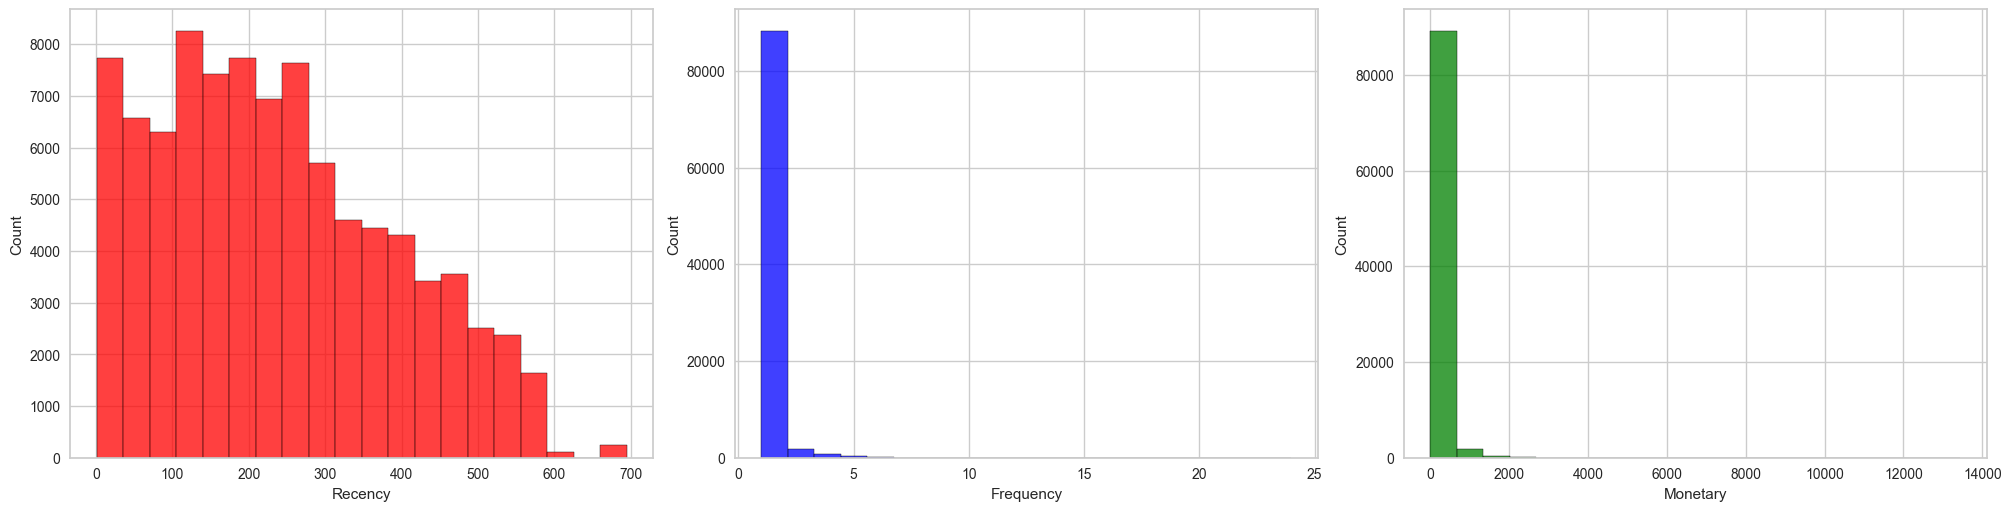

In [34]:
#Visualizing the Recency, Frequency and Monetary distributions.
i = 0
fig = plt.figure(constrained_layout = True,figsize = (20,5))
gs = GridSpec(1, 3, figure=fig)    
X=RFM[["Recency", "Frequency", "Monetary"]]
col = ['red','blue','green',]
for var in list(X.columns):

    plt.subplot(gs[0,i])
    sns.histplot(data=X,x=X[var],color= col[i],bins=20)
    #sns.histplot(X[var],color= col[i],kde=True,bins=20)
   
    #plt.title('Skewness ' + ': ' + round(RFM[var].skew(),2).astype(str))
    i= i+1

In [105]:
RFM_with_date=RFM_with_date.sort_values(by="favorite_purshase_month",ascending=True)

In [30]:
RFM_with_date.columns

Index(['customer_unique_id', 'Frequency', 'Recency', 'Monetary',
       'last_purshase_date', 'favorite_purshase_month'],
      dtype='object')

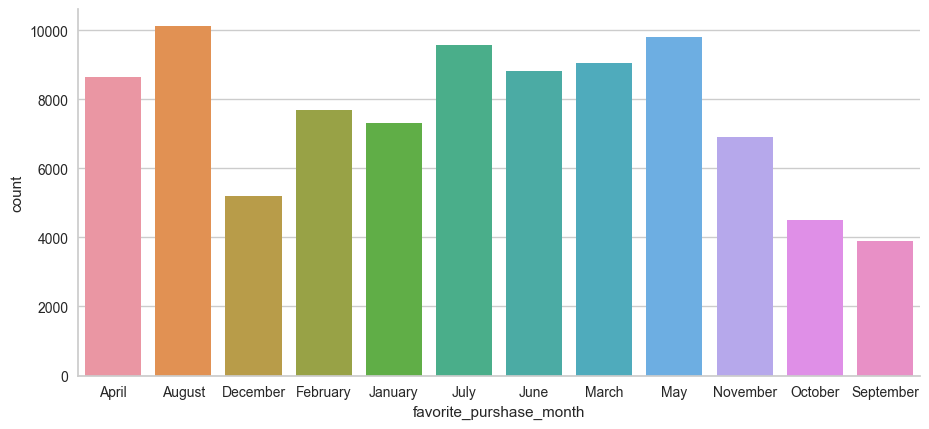

In [106]:

sns.catplot(data=RFM_with_date, x="favorite_purshase_month", kind="count",height=5, aspect=2)

In [70]:
list(RFM_with_date.columns)

['customer_unique_id',
 'Frequency',
 'Recency',
 'Monetary',
 'last_purshase_date',
 'favorite_purshase_month']

**Observations**<br>
les données relatives à la fréquence et au pouvoir d'achat sont relativement asymétriques

In [87]:
def scatter_pair(lists,df,nb_var):
    plt.rc('font', size=30)
    fig = plt.figure(constrained_layout = True,figsize = (25,5))
    gs = GridSpec(1, nb_var, figure=fig) 
    #"Recency", "Frequency", "Monetary"
    #lists=[["Recency", "Frequency"],["Recency","Monetary"],["Frequency","Monetary"]]
    #lists=[["Recency", "Frequency"],["Recency","Monetary"],["Frequency","Monetary"],
    #      ["Recency", 'favorite_purshase_month'],["Frequency","favorite_purshase_month"],["Monetary","favorite_purshase_month"]]
    i=0

    for c in lists:
        plt.subplot(gs[0,i])
        a=sns.scatterplot(data=df,x=c[0],y=c[1]) 
        
        i= i+1

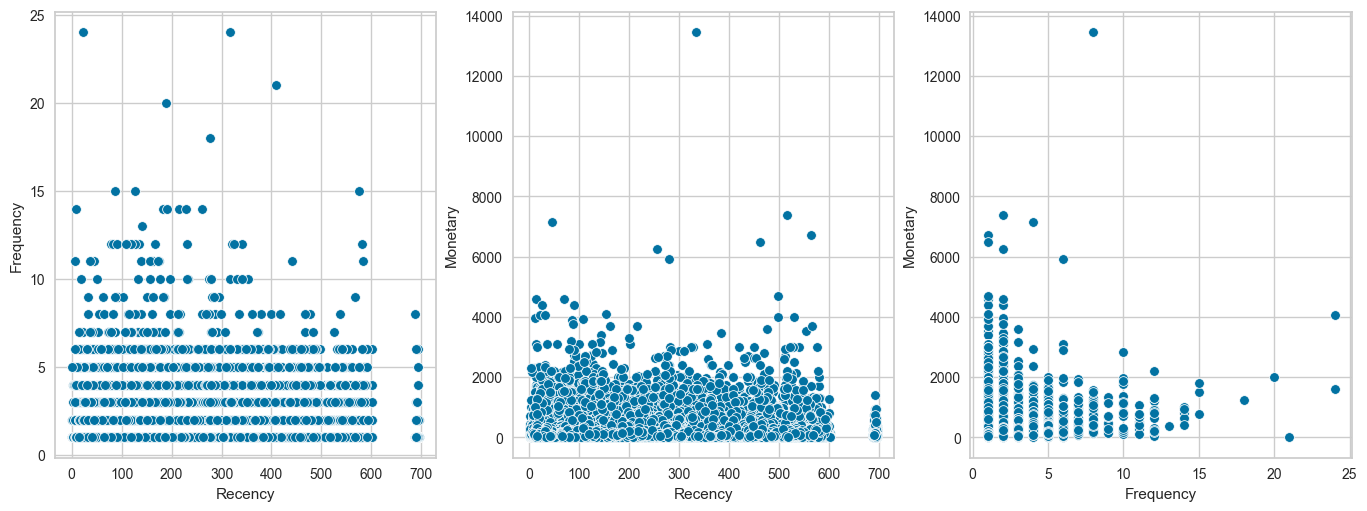

In [69]:
lists1=[["Recency", "Frequency"],["Recency","Monetary"],["Frequency","Monetary"]]
scatter_pair(lists1,RFM_with_date,6)

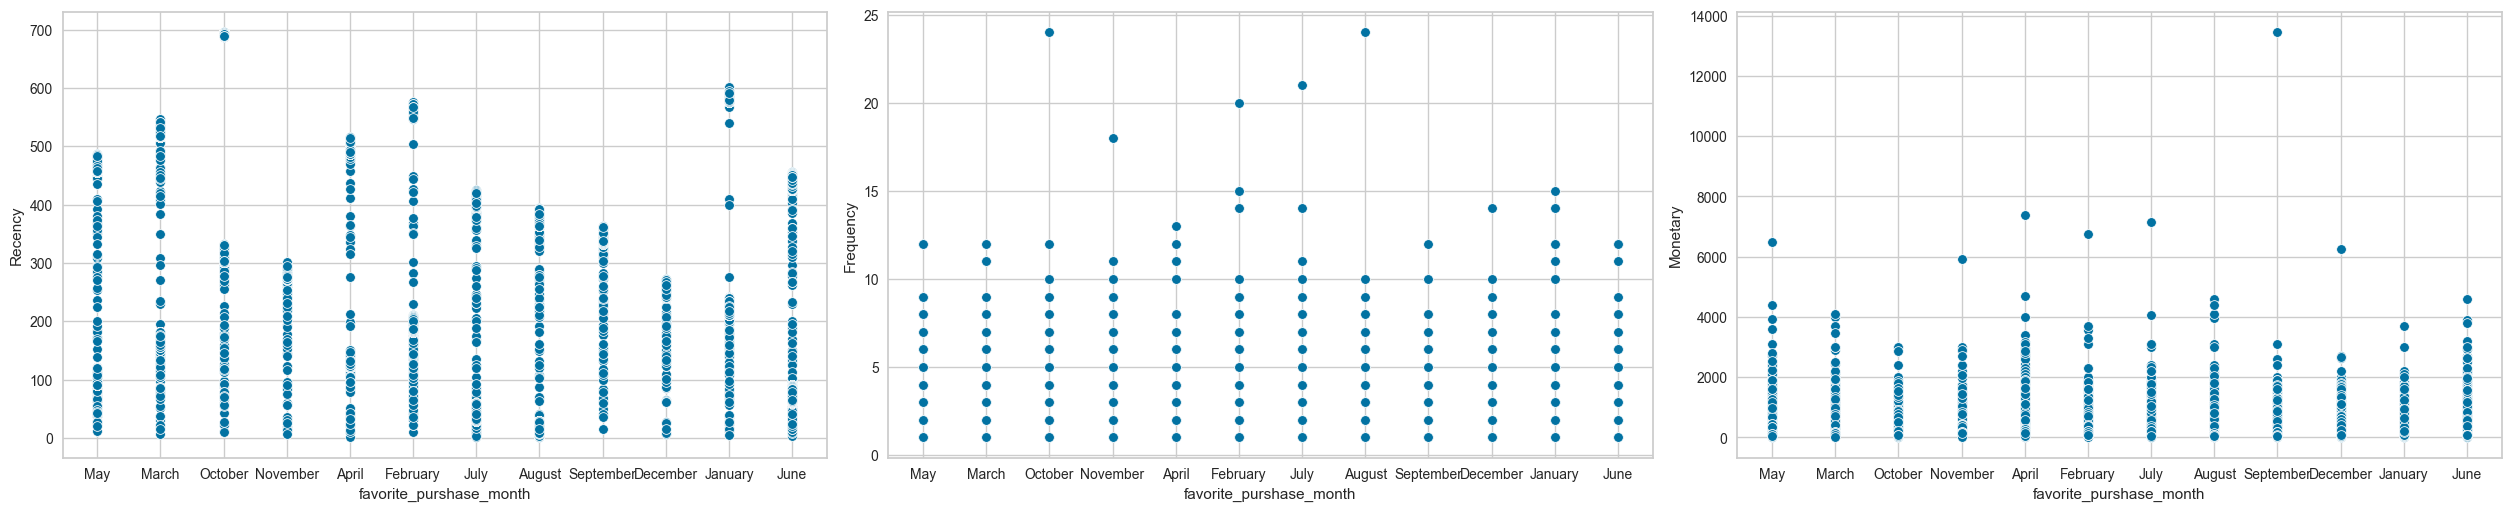

In [88]:
lists2=[['favorite_purshase_month',"Recency"],["favorite_purshase_month","Frequency"],["favorite_purshase_month","Monetary"]]
scatter_pair(lists2,RFM_with_date,3)

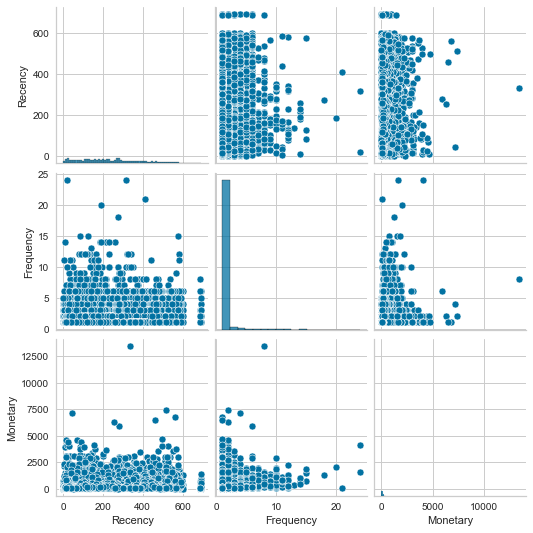

In [29]:
RFM_data = RFM[["Recency", "Frequency", "Monetary"]]

sns.pairplot(RFM_data)

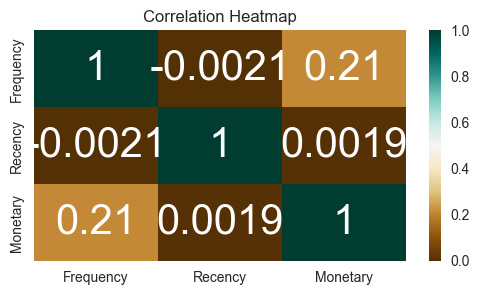

In [103]:
dataframe=RFM[['Frequency', 'Recency', 'Monetary']]
plt.figure(figsize=(6, 3))
heatmap = sns.heatmap(dataframe.corr(),annot=True,cmap='BrBG')
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap');

**Observations**<br>

In [30]:
RFM.to_csv('df_rfm.csv',index=False)


In [31]:
RFM.head()

,customer_unique_id,Frequency,Recency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90
2,0000f46a3911fa3c0805444483337064,1,537,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,321,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,288,180.00


In [52]:
RFM_with_date.columns

Index(['customer_unique_id', 'Frequency', 'Recency', 'Monetary',
       'last_purshase_date'],
      dtype='object')